**Importing the Libraries**


In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.axes as ax

**Loading the Data**


In [13]:
data=pd.read_csv("data_for_lr.csv")


In [14]:
data.head()

,x,y
0,24.0,21.549452
1,50.0,47.464463
2,15.0,17.218656
3,38.0,36.586398
4,87.0,87.288984


In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       700 non-null    float64
 1   y       699 non-null    float64
dtypes: float64(2)
memory usage: 11.1 KB


In [16]:
data.isnull().sum()

x    0
y    1
dtype: int64

**Data Processing**

In [17]:
data = data.dropna()
print("shape of the data : ",data.shape)

shape of the data :  (699, 2)


**Splitting the Data**

In [18]:
#training input and output
train_input = np.array(data.x[0:500]).reshape(500,1)
train_output = np.array(data.y[0:500]).reshape(500,1)

#validation data input and output
test_input = np.array(data.x[500:700]).reshape(199,1)
test_output = np.array(data.y[500:700]).reshape(199,1)

In [19]:
print(f"training  input data shape = {train_input.shape}")
print(f"training output data shape = {train_output.shape}")
print(f"testing input data shape = {test_input.shape}")
print(f"testing output data shape = {test_output.shape}")


training  input data shape = (500, 1)
training output data shape = (500, 1)
testing input data shape = (199, 1)
testing output data shape = (199, 1)


**<font color = "green" size=5>Linear Regression</font>**

**<font size=3>Forward Propagation</font>**

f(x)=m*x+c

In [20]:
def forward_propagation(train_input, parameters):
    m=parameters["m"]
    c=parameters["c"]
    
    predictions=np.multiply(m,train_input)+c
    return predictions

**<font size=3>Cost Function</font>**

summation(1/2n *(y-f(x))^2)

In [21]:
def cost_function(predictions,train_output):
    cost = np.mean((predictions-train_output)**2)*0.5
    return cost
    

**<font size=3>Gradient Descent for back Propagation</font>**


df=sum(f(x)-y)/n

dm=df*x

dc=df*1



In [22]:
def backward_propagation(train_input,train_ouput,predictions):
    derivatives={}
    df = predictions-train_output
    dm = np.mean(np.multiply(df,train_input))
    dc = np.mean(df)
    
    derivatives["dm"] = dm
    derivatives["dc"] = dc
    
    return derivatives

    

**<font size=3>Update the Paramenters</font>**

m'=m-alpha*dm

c'=c-alpha*dc

In [23]:
def update_paramenters(parameters,derivatives,learning_rate):
    parameters["m"] = parameters["m"] - learning_rate * derivatives["dm"]
    parameters["c"] = parameters["c"] - learning_rate *derivatives["dc"]
    
    return parameters


**<font color = "green" size=5>Model Training</font>**

In [24]:
def train(train_input,train_output,learning_rate,iters):
    #random parameters
    parameters=dict()
    parameters["m"]=np.random.uniform(0,1)
    parameters["c"]=np.random.uniform(0,1)
    
    
    plt.figure()
    
    loss=list()
    
    #itersation
    for i in range(iters):
        
        #forward propagation
        predictions = forward_propagation(train_input,parameters)
        
        #cost 
        cost=cost_function(predictions,train_output)
        loss.append(cost)
        print(f"iteration = {i+1}, los ={cost}")
        
        #plot
        fig,ax=plt.subplots()
        ax.plot(train_input,train_output,"+",label="original")
        ax.plot(train_input,predictions,"*",label="training")
        
        legend=ax.legend()
        
        
        
        #back
        derivatives=backward_propagation(train_input,train_output,predictions)
        
        #update the parameters
        parameters=update_paramenters(parameters,derivatives,learning_rate)
        
        
    return parameters , loss

        

iteration = 1, los =30.18870743162594
iteration = 2, los =15.848998034248895
iteration = 3, los =9.343055185260496
iteration = 4, los =6.391300896319586
iteration = 5, los =5.052085893878901
iteration = 6, los =4.444481751879246
iteration = 7, los =4.168810267664922
iteration = 8, los =4.043736997991
iteration = 9, los =3.986990305103745
iteration = 10, los =3.961243455826834
iteration = 11, los =3.9495612699735356
iteration = 12, los =3.944260237535026
iteration = 13, los =3.9418543415097247
iteration = 14, los =3.9407619721227602
iteration = 15, los =3.9402655512674123
iteration = 16, los =3.940039512961842
iteration = 17, los =3.9399361475594747
iteration = 18, los =3.9398884390300526
iteration = 19, los =3.9398659821264106
iteration = 20, los =3.9398549819542343


C:\Users\B0266834\AppData\Local\Temp\ipykernel_4928\2759590140.py:24: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig,ax=plt.subplots()


<Figure size 640x480 with 0 Axes>

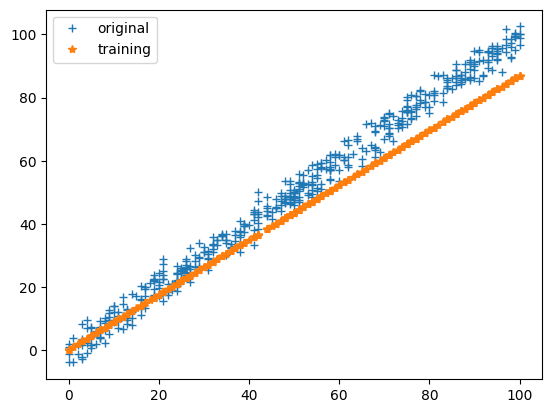

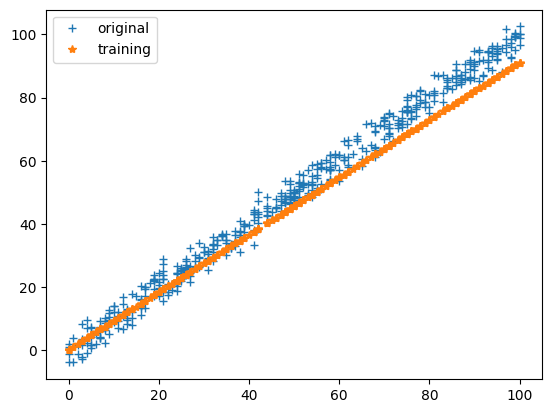

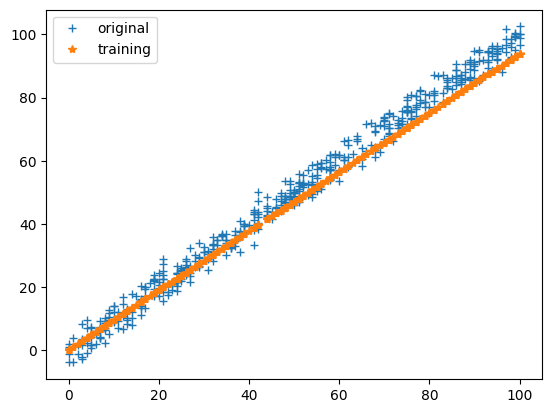

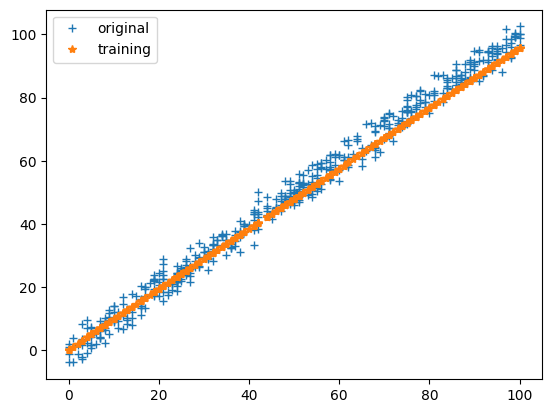

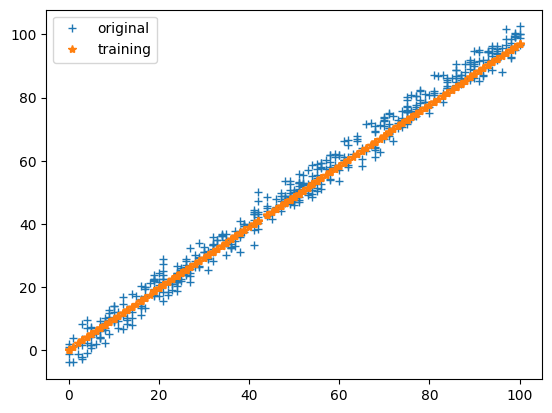

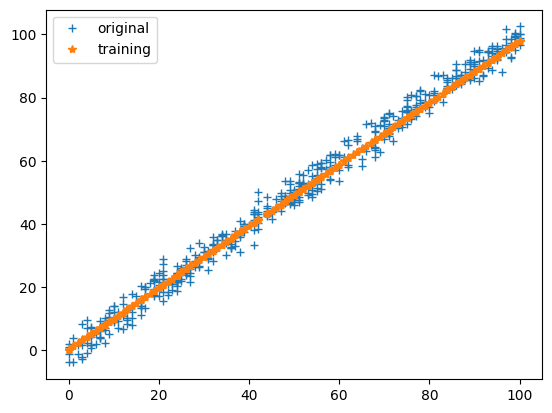

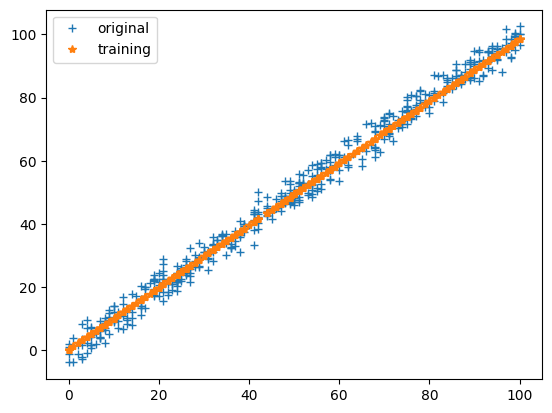

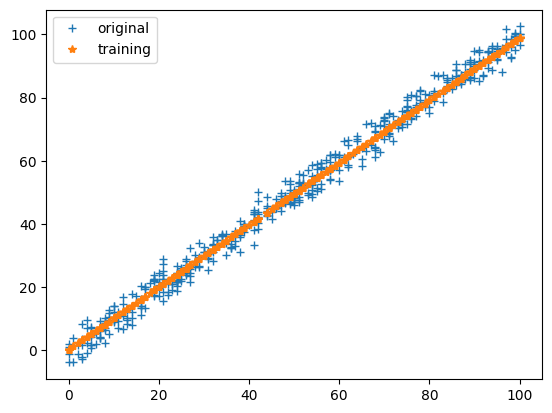

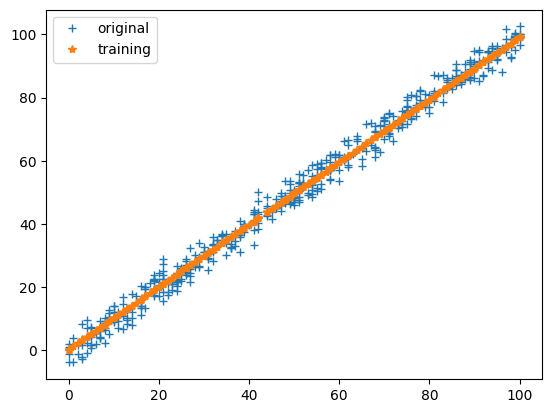

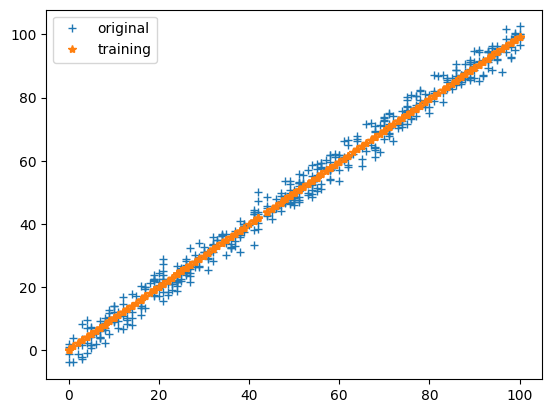

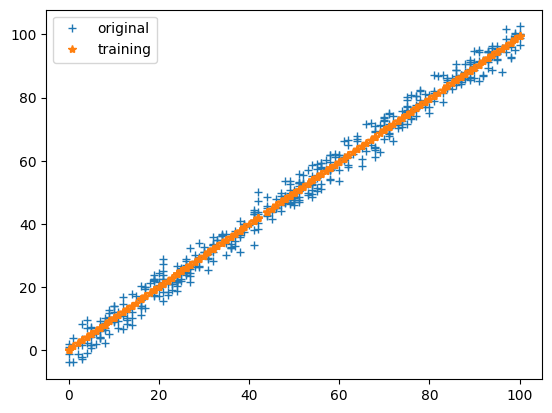

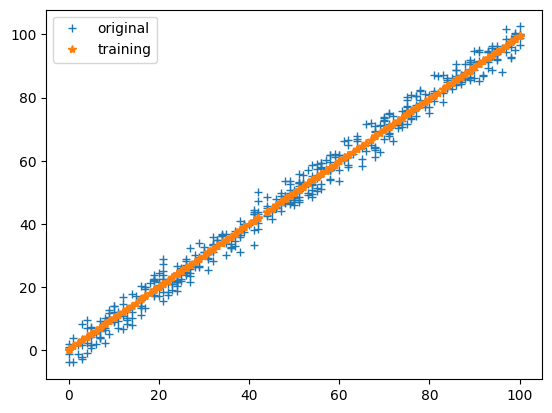

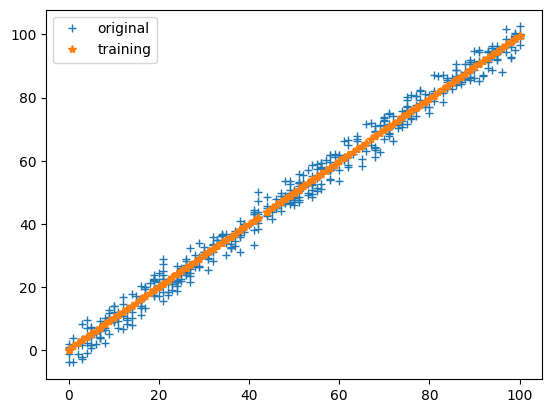

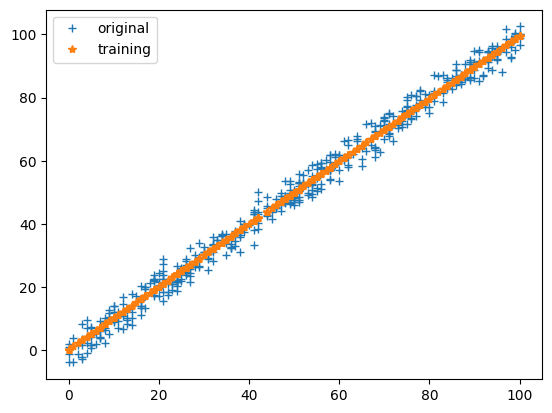

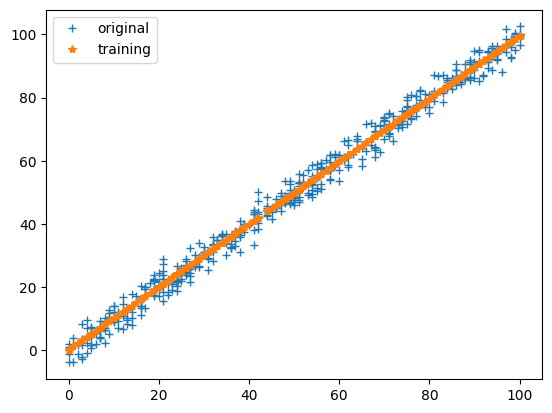

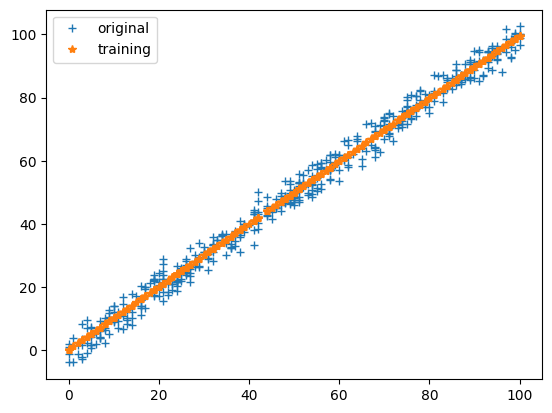

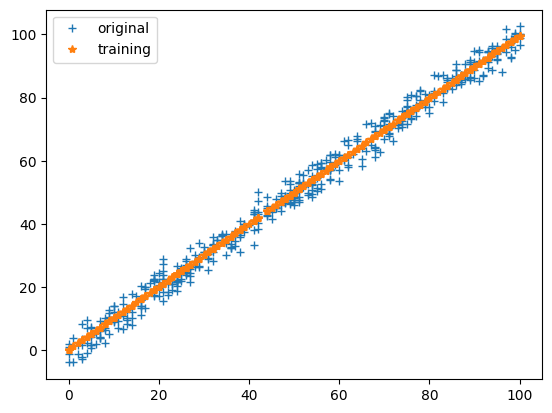

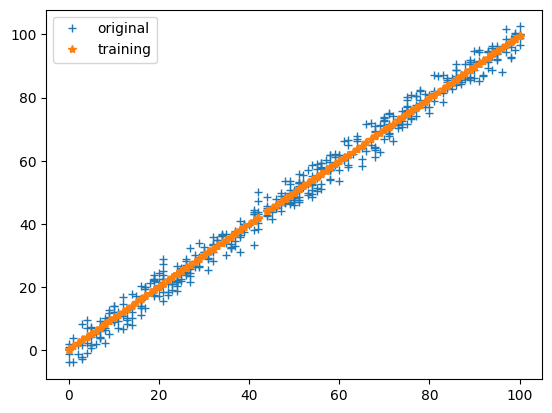

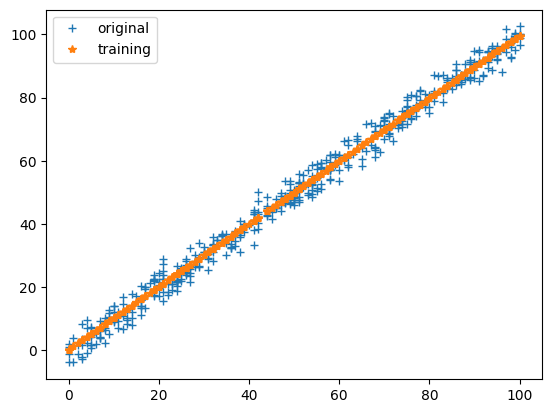

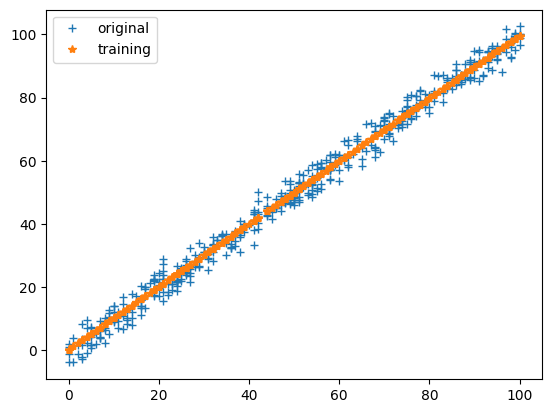

In [25]:
parameters,loss=train(train_input,train_output,0.0001,20)

In [26]:
print(parameters)

{'m': 0.9936268504758966, 'c': 0.24778031800741224}


In [27]:
loss

[30.18870743162594,
 15.848998034248895,
 9.343055185260496,
 6.391300896319586,
 5.052085893878901,
 4.444481751879246,
 4.168810267664922,
 4.043736997991,
 3.986990305103745,
 3.961243455826834,
 3.9495612699735356,
 3.944260237535026,
 3.9418543415097247,
 3.9407619721227602,
 3.9402655512674123,
 3.940039512961842,
 3.9399361475594747,
 3.9398884390300526,
 3.9398659821264106,
 3.9398549819542343]

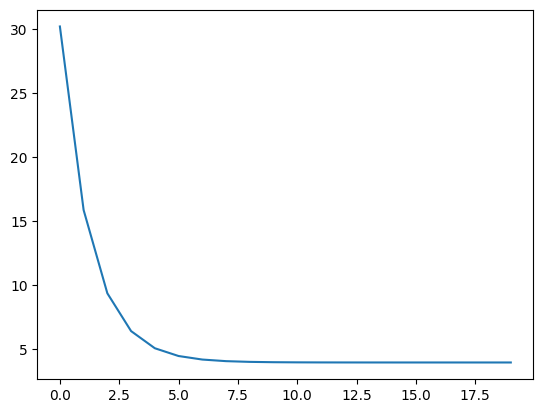

In [28]:
plt.plot(loss)

In [29]:
print(parameters)

{'m': 0.9936268504758966, 'c': 0.24778031800741224}
